<a href="https://colab.research.google.com/github/LawTAGS/Deep-Learning-Classwork/blob/main/Assignments/DL2025_Tugas_6_10121091_Bryan_Guok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Identitas**#

Nama : Bryan Guok\
NIM : 10121091

#**Tugas 6: Aplikasi RNN dan LSTM pada Data Saham**#

Tugas ini merupakan lanjutan tugas 2 (aplikasi MLP pada Data Saham).
1. Saham yang dipilih boleh data saham dalam negeri atau saham luar negeri dengan
banyaknya data minimal data 1 tahun dengan 3-4 fitur, misalkan : Open, High, Low dan
Close sebagai data.
2. Silakan gunakan dan modifikasi program RNN dan LSTM yang sudah dipelajari di kelas
dan pastikan programnya bisa berkerja dan ambil kesimpulan mana metode terbaik
untuk data anda.
3. Lakukan pembagian 70:30 untuk perbandingan traning dan testing, dan lakukan perdiksi
apabila memungkinkan.

##**1. Import Library**##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.layers import Dropout

# Untuk hasil yang konsisten
np.random.seed(10121091)

##**2. Data Processing**##

###**Mengambil Data**###

In [ ]:
data = yf.download('AAPL', period='1y', interval='1d')
data = data[['Open', 'High', 'Low', 'Close']]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

# Tampilkan 5 baris awal
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close
Ticker,AAPL,AAPL,AAPL,AAPL
0,185.772794,186.121155,181.801556,182.518173
1,181.493040,183.334337,179.572103,180.856049
2,182.587823,184.031006,180.467844,181.542755
3,181.990679,182.209646,180.597249,181.881195
4,181.702043,183.792180,181.254160,183.702606


###**Normalisasi Data**###

In [ ]:
# Skala normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Fungsi untuk membuat data sequence
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step])
        y.append(dataset[i+time_step, 3]) # Keempat fitur Open, High, Low, dan Close
                                          # digunakan untuk memprediksi Close pada time step berikutnya
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_step=60)

###**Splitting Data**###

In [ ]:
# Men-splitting data degan data training sebesar 70% dari data keseluruhan
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10121091
)

##**3. Modelling Neural Network**##

###**Model RNN**###

In [ ]:
# Model RNN yang dibentuk menggunakan SimpleRNN dengan 2 layer dan menggunakan fungsi aktivasi tanh
# Dropout yang digunakan bertujuan untuk mencegah overfitting
model_rnn = Sequential([
    SimpleRNN(50, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    SimpleRNN(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

# Optimisasi yang digunakan adalah Adam karena paling umum digunakan
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.9998
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3496
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3353
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2654
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2711
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2404
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2751
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1660
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1370
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1350
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1746
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0977
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1372
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1108
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1460
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

###**Model LSTM**###

In [ ]:
# Model LSTM yang dibentuk menggunakan fungsi bawaan dari Tensorflow dengan 2 layer dan menggunakan aktivasi tanh
model_lstm = Sequential([
    LSTM(50, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1992
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0665
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0226
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0383
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0259
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0185
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0170
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0195
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0163
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0141
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0166
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0147
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0133
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0137
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0145
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

##**4. Evaluasi dan Visualisasi**##

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step


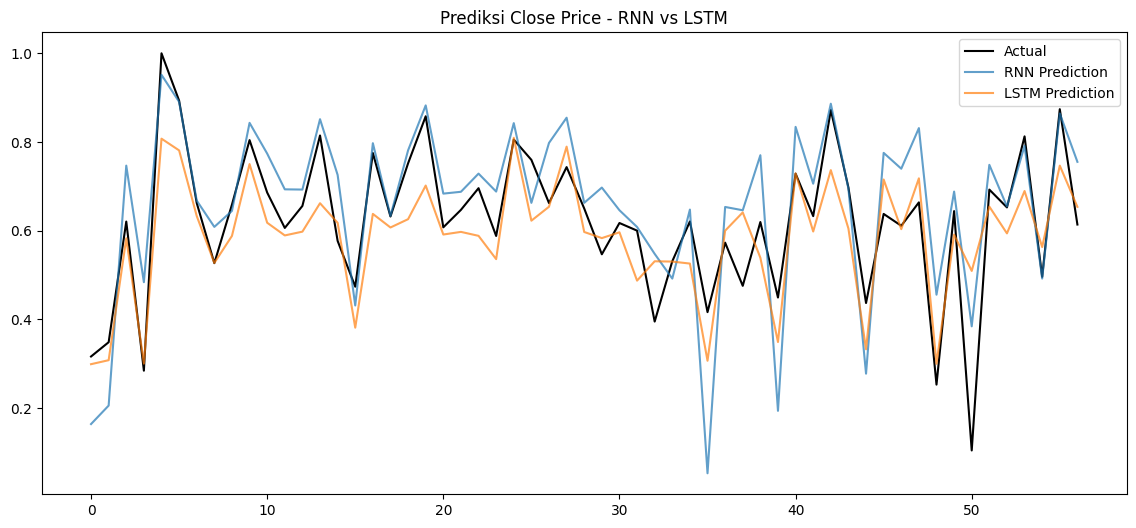

In [ ]:
# Dibentuk grafik untuk memprediksi close price model dan membandingkan dengan close price yang aktual
y_pred_rnn = model_rnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual', color='black')
plt.plot(y_pred_rnn, label='RNN Prediction', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Prediction', alpha=0.7)
plt.title('Prediksi Close Price - RNN vs LSTM')
plt.legend()
plt.show()

##**Kesimpulan**##

In [ ]:
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

print(f"MSE RNN  : {mse_rnn:.6f}")
print(f"MSE LSTM : {mse_lstm:.6f}")

MSE RNN  : 0.013490
MSE LSTM : 0.009858


Berdasarkan hasil dari MSE, nilai MSE yang didapat dari LSTM lebih kecil dibandingkan RNN.\
Meskipun secara bentuk grafik dari RNN lebih mendekati, namun dari selisih nilainya terhadap nilai aktual lebih jauh sehingga nilai MSE dari RNN lebih besar.